In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA,TruncatedSVD
import matplotlib.patches as mpatches
import time

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalance_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score, accuracy_score,classification_report
from collections import Counter
from sklearn.model_selection import KFold,StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


PCA done data

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13953.000000,13953.000000
mean,10121.161817,-0.235676,0.284287,0.846047,0.302775,-0.118730,0.128013,-0.157297,-0.016148,0.989827,-0.333609,0.865847,-1.560515,1.008561,0.843260,-0.190991,-0.040584,0.420274,0.001080,-0.086197,0.022740,-0.068037,-0.157471,-0.035585,0.011158,0.117019,0.035544,0.012787,0.002122,63.882442,0.004013
std,7739.625811,1.720315,1.394804,1.561376,1.500595,1.289494,1.320395,1.238583,1.262024,1.214044,1.233066,1.193020,1.538233,1.159372,1.339198,0.979098,0.970020,1.226870,0.846063,0.826925,0.584038,0.873942,0.621845,0.499807,0.587225,0.427953,0.558290,0.399550,0.255710,177.887021,0.063227
min,0.000000,-27.670569,-34.607649,-24.667741,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,-14.166795,-2.595325,-17.769143,-3.389510,-19.214325,-4.152532,-12.227189,-18.587366,-8.061208,-4.932733,-13.276034,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2984.250000,-0.969786,-0.282728,0.407297,-0.623141,-0.717155,-0.624025,-0.616307,-0.182270,0.288101,-0.786564,0.069939,-2.474334,0.202567,0.266895,-0.773039,-0.529582,-0.054278,-0.436966,-0.574853,-0.162353,-0.271778,-0.549723,-0.173807,-0.339656,-0.135887,-0.374596,-0.076862,-0.014869,5.490000,0.000000
50%,9086.500000,-0.319439,0.252904,0.960978,0.220104,-0.191627,-0.144198,-0.111960,0.016945,0.971414,-0.382171,0.799094,-1.866619,1.107065,1.123058,-0.050635,0.029426,0.415021,0.053610,-0.087252,-0.038037,-0.132304,-0.122777,-0.045041,0.060208,0.155162,-0.035825,-0.000950,0.016238,15.690000,0.000000
75%,17103.500000,1.162662,0.884741,1.607031,1.198942,0.351255,0.508494,0.421830,0.265736,1.654184,0.124503,1.664089,-0.425290,1.862585,1.562890,0.485050,0.532973,0.895445,0.496725,0.435214,0.138816,0.018677,0.228997,0.069750,0.392734,0.393032,0.375271,0.098516,0.072497,52.150000,0.000000
max,24759.000000,1.960497,10.558600,4.101716,11.927512,34.099309,21.393069,34.303177,10.535558,10.392889,12.259949,12.018913,3.774837,4.465413,7.692209,3.635042,4.816252,9.253526,4.295648,4.555359,8.012574,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [ ]:
df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

In [ ]:
df["V8"].fillna(value=df["V8"].mean(),inplace=True)
df["V9"].fillna(value=df["V9"].mean(),inplace=True)
df["V10"].fillna(value=df["V10"].mean(),inplace=True)
df["V11"].fillna(value=df["V11"].mean(),inplace=True)
df["V12"].fillna(value=df["V12"].mean(),inplace=True)
df["V13"].fillna(value=df["V13"].mean(),inplace=True)
df["V14"].fillna(value=df["V14"].mean(),inplace=True)
df["V15"].fillna(value=df["V15"].mean(),inplace=True)
df["V16"].fillna(value=df["V16"].mean(),inplace=True)
df["V17"].fillna(value=df["V17"].mean(),inplace=True)
df["V18"].fillna(value=df["V18"].mean(),inplace=True)
df["V19"].fillna(value=df["V19"].mean(),inplace=True)
df["V20"].fillna(value=df["V20"].mean(),inplace=True)
df["V21"].fillna(value=df["V21"].mean(),inplace=True)
df["V22"].fillna(value=df["V22"].mean(),inplace=True)
df["V23"].fillna(value=df["V23"].mean(),inplace=True)
df["V24"].fillna(value=df["V24"].mean(),inplace=True)
df["V25"].fillna(value=df["V25"].mean(),inplace=True)
df["V26"].fillna(value=df["V26"].mean(),inplace=True)
df["V27"].fillna(value=df["V27"].mean(),inplace=True)
df["V28"].fillna(value=df["V28"].mean(),inplace=True)
df["Amount"].fillna(value=df["Amount"].mean(),inplace=True)
df["Class"].fillna(value=df["Class"].median(),inplace=True)

checking after replacing nan

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df["Class"].value_counts()[0]

13898

In [ ]:
# print("frauds",df["Class"].value_counts()[1]/len(df)*100)
df["Class"].value_counts()[1]

56

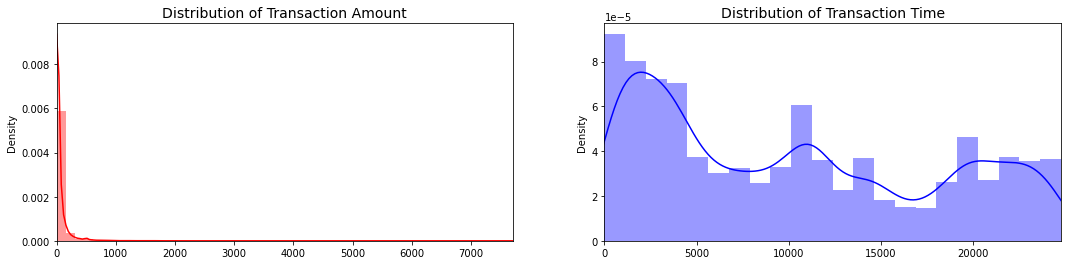

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()



In [ ]:
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount','scaled_time'], axis = 1, inplace=True)
df.insert(0,'scaled_amount',scaled_amount)
df.insert(1,'scaled_time',scaled_time)
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.869770,-0.643554,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-0.278674,-0.643554,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,7.777683,-0.643483,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,2.310066,-0.643483,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,1.163444,-0.643412,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop('Class',axis=1)
y = df['Class']

original_X_train, original_X_test, original_y_train, original_y_test = train_test_split(X,y, test_size=0.2, random_state=42)
original_X_train = original_X_train.values
original_X_test = original_X_test.values
original_y_train = original_y_train.values
original_y_test = original_y_test.values

In [ ]:
train_unique_label, train_count_label = np.unique(original_y_train, return_counts=True)
test_unique_label, test_count_label = np.unique(original_y_test, return_counts=True)

In [ ]:
print(train_unique_label)
print(train_count_label)
print(test_unique_label)
print(test_count_label)
print(train_count_label/len(original_y_train))
print(test_count_label/len(original_y_test))

[0. 1.]
[11117    46]
[0. 1.]
[2781   10]
[0.99587924 0.00412076]
[0.99641705 0.00358295]


sampling - undersampling


In [ ]:
df = df.sample(frac=1)

fraud_df = df.loc[df['Class']==1]
no_fraud_df = df.loc[df['Class']==0][:492]

normal_distributed_df = pd.concat([fraud_df,no_fraud_df])
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
571,-0.058178,-0.613312,-0.856567,0.842156,1.716677,-0.016178,1.054486,-0.440338,1.463574,-0.378757,-0.728544,0.042132,1.471733,-0.206399,-1.690501,0.476756,-0.136424,-0.318365,-0.551951,-0.188746,-0.857468,-0.101960,0.049032,0.297741,-0.456502,0.197724,0.610523,-0.420531,-0.458258,-0.381306,0.0
1605,0.092248,-0.555093,1.171861,-0.483821,1.667112,0.548964,-1.587026,-0.077683,-1.114372,0.106680,-0.577481,0.661054,0.201700,0.820112,1.669537,-0.505057,1.503648,-1.247772,-0.109866,1.169530,-2.122101,-0.456732,-0.025100,0.531182,0.081757,0.606306,0.152988,-0.261267,0.126113,0.055000,0.0
4378,0.220817,-0.376968,1.309924,-0.477625,0.785645,-0.414668,-1.112330,-0.729377,-0.748879,-0.110725,0.617772,0.213517,1.126569,-3.333885,0.846459,1.512603,0.406942,0.864163,1.398661,-1.747834,-0.075207,-0.040014,-0.196876,-0.491814,0.212867,0.301446,0.053767,-0.509520,-0.008844,0.017283,0.0
12869,1.806289,0.957877,0.879295,0.001973,-0.094510,1.264449,0.544229,0.705941,0.168938,0.193764,1.159581,-0.522916,1.606485,-2.525081,0.167830,2.430276,1.171046,-1.531022,1.822531,-1.961324,-2.152379,-0.232132,0.037570,0.273465,-0.036151,-0.708290,0.389360,-0.232611,0.009744,0.007320,0.0
4387,0.095463,-0.376826,1.256810,-0.563420,0.655635,-0.658805,-0.705225,0.244468,-0.940785,0.194022,0.369569,0.339592,2.774090,-2.637088,0.844850,1.708053,-0.022162,0.853401,1.311921,-1.611392,-0.027672,-0.060152,-0.140936,-0.313784,0.194999,-0.397384,-0.004290,-0.476143,0.005130,-0.000610,0.0


In [ ]:
print('Distribution of the classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

Distribution of the classes in the subsample dataset
0.0    0.89781
1.0    0.10219
Name: Class, dtype: float64


Correlation Matrices

Text(0.5, 1.0, 'Imbalanced correlation matrix \n')

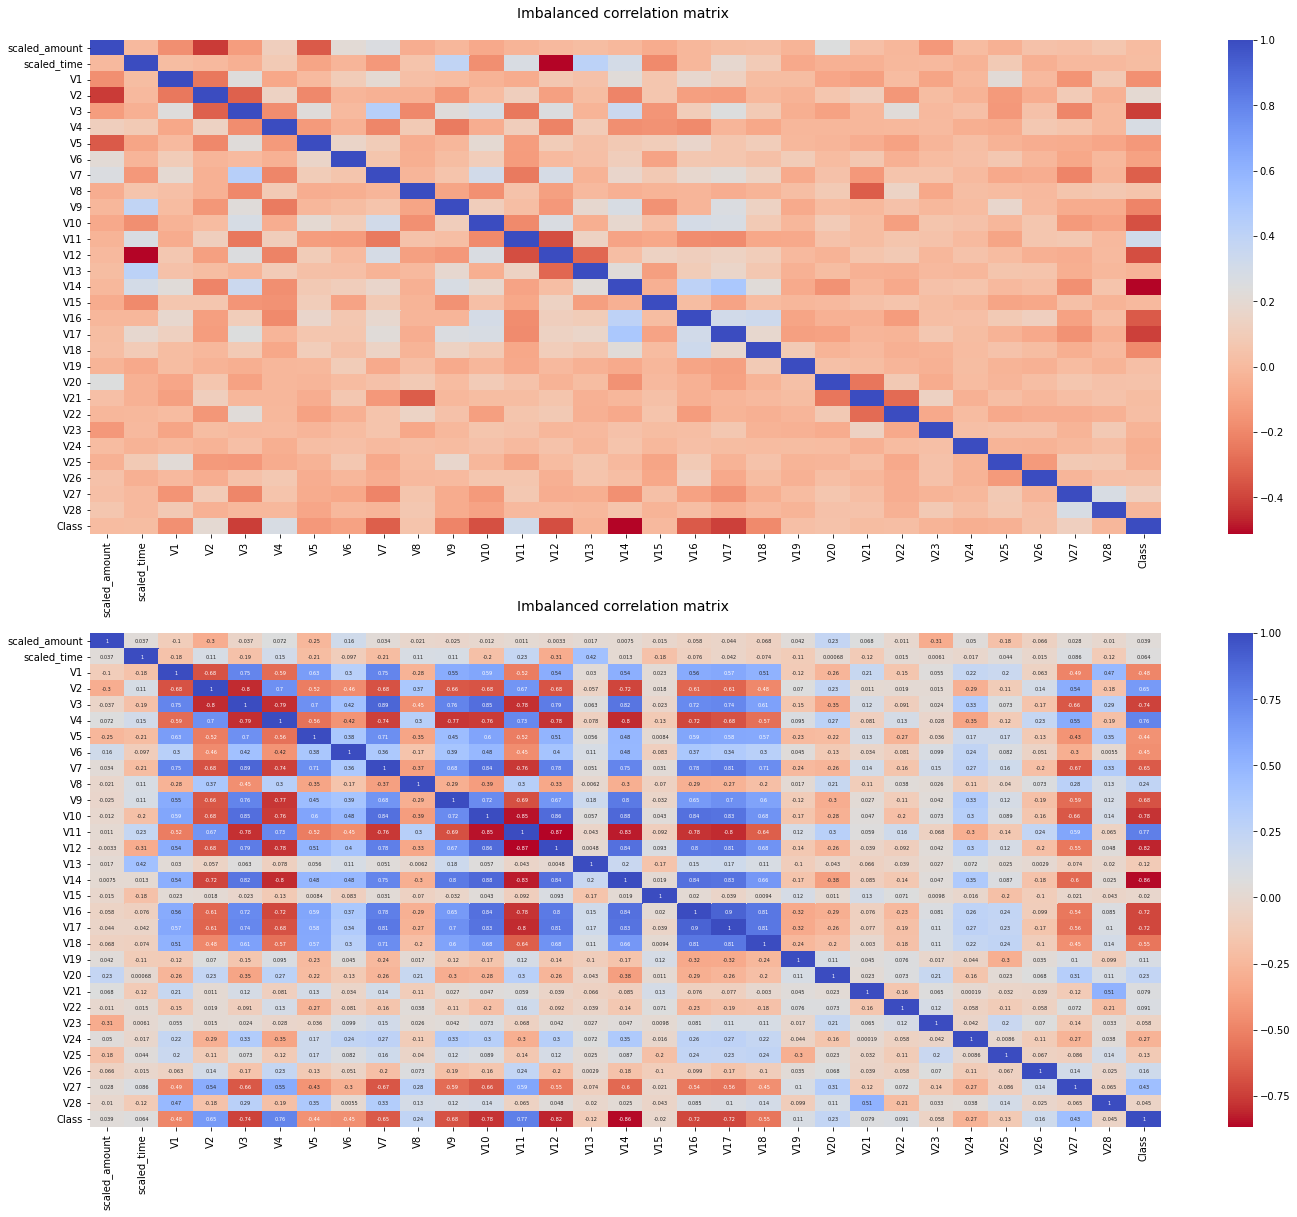

In [ ]:
f, (ax1,ax2) = plt.subplots(2,1,figsize=(24,20))
corr=df.corr()
sns.heatmap(corr, cmap='coolwarm_r',annot_kws={'size':5}, ax=ax1)
ax1.set_title("Imbalanced correlation matrix \n", fontsize=14)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':5}, ax=ax2, annot=True)
ax2.set_title("Imbalanced correlation matrix \n", fontsize=14)


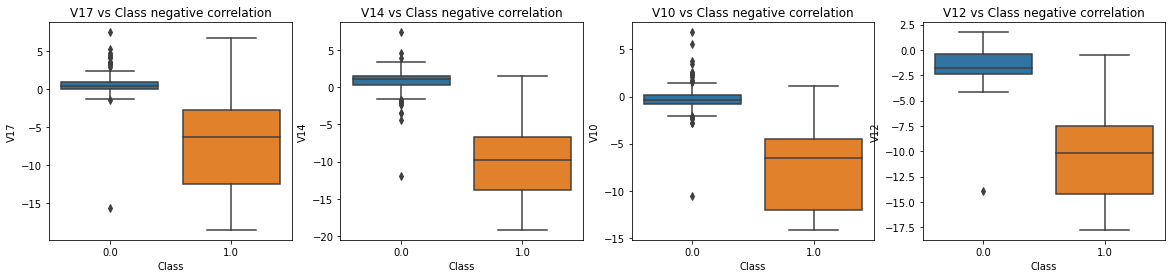

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.boxplot(x = "Class", y='V17', data = new_df, ax=axes[0])
axes[0].set_title('V17 vs Class negative correlation')

sns.boxplot(x='Class', y='V14', data = new_df, ax=axes[1])
axes[1].set_title("V14 vs Class negative correlation")

sns.boxplot(x='Class', y='V10', data = new_df, ax=axes[2])
axes[2].set_title("V10 vs Class negative correlation")

sns.boxplot(x='Class', y='V12', data = new_df, ax=axes[3])
axes[3].set_title("V12 vs Class negative correlation")

plt.show()

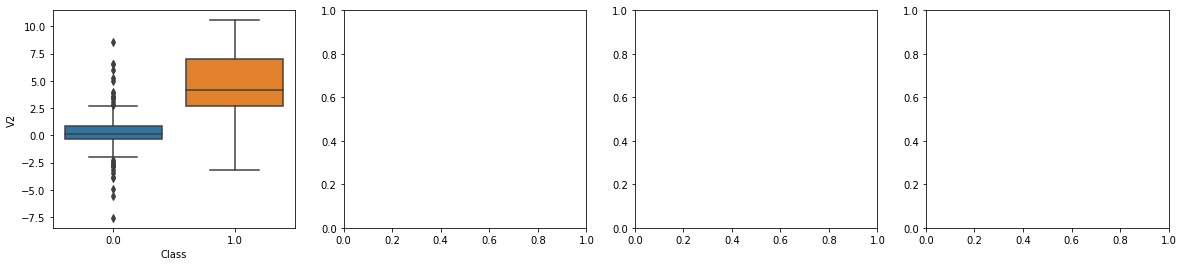

In [ ]:
f,axes = plt.subplots(ncols=4, figsize=(20,4))
sns.boxplot(x="Class", y="V2", data= new_df, ax=axes[0])
plt.show()

Text(0.5, 1.0, 'V14 distribution')

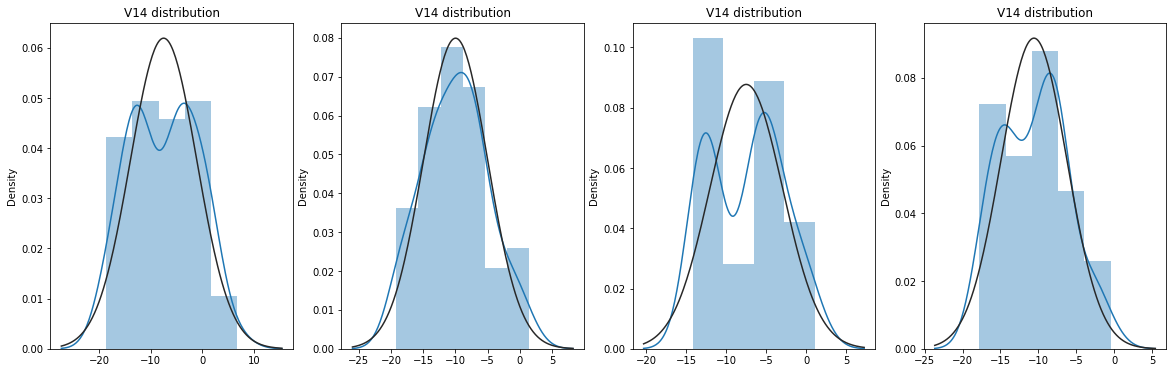

In [ ]:
from scipy.stats import norm
f,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,6))

v17_fraud_dist = new_df['V17'].loc[new_df['Class'] == 1].values
sns.distplot(v17_fraud_dist, ax=ax1, fit=norm)
ax1.set_title('V14 distribution')

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist, ax=ax2, fit=norm)
ax2.set_title('V14 distribution')

v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist, ax=ax3, fit=norm)
ax3.set_title('V14 distribution')

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist, ax=ax4, fit=norm)
ax4.set_title('V14 distribution')

In [ ]:
v14_fraud = new_df['V14'].loc[new_df['Class']==1].values
q25,q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25:{} | Quartile 75: {}'.format(q25,q75))
v14_iqr = q75 - q25
print('iqr:{}'.format(v14_iqr))

#cut off
v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25-v14_cut_off, q75+v14_cut_off
print(" v14 lower and upper ",v14_lower, v14_upper)

outlier = [x for x in v14_fraud if x< v14_lower or x>v14_upper]
print("outliers {}".format(len(outlier)))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14']<v14_lower)].index)

Quartile 25:-13.791708108473 | Quartile 75: -6.724517856016088
iqr:7.0671902524569115
 v14 lower and upper  -24.39249348715837 3.8762675226692798
outliers 0


In [ ]:
v10_fraud = new_df['V10'].loc[new_df['Class']==1].values
q25,q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
print('Quartile 25:{} | Quartile 75: {}'.format(q25,q75))
v10_iqr = q75 - q25
print('iqr:{}'.format(v10_iqr))

#cut off
v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25-v10_cut_off, q75+v10_cut_off
print(" v14 lower and upper ",v10_lower, v10_upper)

outlier = [x for x in v10_fraud if x< v10_lower or x>v10_upper]
print("outliers {}".format(len(outlier)))

new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10']<v10_lower)].index)

Quartile 25:-12.076590426247225 | Quartile 75: -4.480936625531607
iqr:7.595653800715619
 v14 lower and upper  -23.470071127320654 6.912544075541822
outliers 0


In [ ]:
v17_fraud = new_df['V17'].loc[new_df['Class']==1].values
q25,q75 = np.percentile(v17_fraud, 25), np.percentile(v17_fraud, 75)
print('Quartile 25:{} | Quartile 75: {}'.format(q25,q75))
v17_iqr = q75 - q25
print('iqr:{}'.format(v17_iqr))

#cut off
v17_cut_off = v17_iqr * 1.5
v17_lower, v17_upper = q25-v17_cut_off, q75+v17_cut_off
print(" v17 lower and upper ",v17_lower, v17_upper)

outlier = [x for x in v17_fraud if x< v17_lower or x>v17_upper]
print("outliers {}".format(len(outlier)))

new_df = new_df.drop(new_df[(new_df['V17'] > v17_upper) | (new_df['V17']<v17_lower)].index)

Quartile 25:-12.599463019262124 | Quartile 75: -2.7713596765857726
iqr:9.828103342676352
 v17 lower and upper  -27.341618033276653 11.970795337428756
outliers 0


In [ ]:
v12_fraud = new_df['V12'].loc[new_df['Class']==1].values
q25,q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
print('Quartile 25:{} | Quartile 75: {}'.format(q25,q75))
v12_iqr = q75 - q25
print('iqr:{}'.format(v12_iqr))

#cut off
v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25-v12_cut_off, q75+v12_cut_off
print(" v12 lower and upper ",v12_lower, v12_upper)

outlier = [x for x in v12_fraud if x< v12_lower or x>v12_upper]
print("outliers {}".format(len(outlier)))

new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12']<v12_lower)].index)

Quartile 25:-14.267783478404374 | Quartile 75: -7.473516561506255
iqr:6.794266916898119
 v12 lower and upper  -24.459183853751554 2.717883813840924
outliers 0


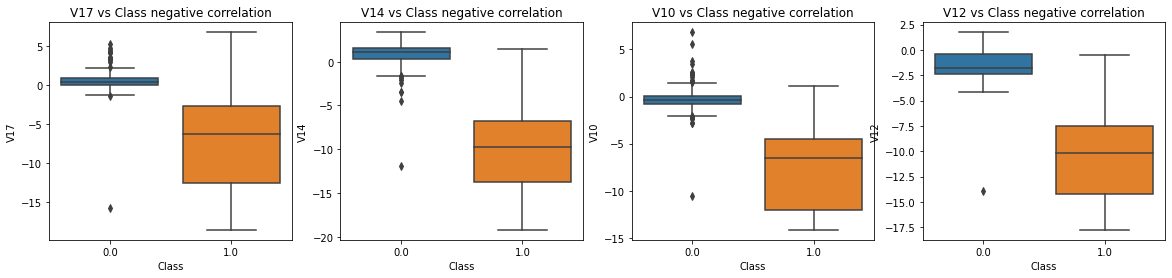

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.boxplot(x = "Class", y='V17', data = new_df, ax=axes[0])
axes[0].set_title('V17 vs Class negative correlation')

sns.boxplot(x='Class', y='V14', data = new_df, ax=axes[1])
axes[1].set_title("V14 vs Class negative correlation")

sns.boxplot(x='Class', y='V10', data = new_df, ax=axes[2])
axes[2].set_title("V10 vs Class negative correlation")

sns.boxplot(x='Class', y='V12', data = new_df, ax=axes[3])
axes[3].set_title("V12 vs Class negative correlation")

plt.show()

In [ ]:
X = new_df.drop('Class',axis=1)
y = new_df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
classifier = {
    'LogisticRegression':LogisticRegression(),
    'Knearest': KNeighborsClassifier(),
    'Support Vector Classifier':SVC(),
    'DecisionTreeClassifier':DecisionTreeClassifier()
}

In [ ]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifier.items():
  classifier.fit(X_train, y_train)
  training_score = cross_val_score(classifier, X_train, y_train, cv=5)
  print(classifier.__class__.__name__, round(training_score.mean(),2)*100)

LogisticRegression 98.0
KNeighborsClassifier 98.0
SVC 99.0
DecisionTreeClassifier 97.0


In [ ]:
from sklearn.model_selection import GridSearchCV

log_reg_params = {'penalty':['l1','l2'],'C':[0.001,0.01,0.1,1,10,100,1000]}
grid_log_reg = GridSearchCV(LogisticRegression(),log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

In [ ]:
training_LR_score = cross_val_score(grid_log_reg, X_train,y_train,cv=5)
round(training_LR_score.mean(),2)*100

98.0

undersample

In [ ]:
Counter(undersample_y)

Counter({0.0: 13898, 1.0: 56})

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample_X = df.drop('Class',axis=1)
undersample_y = df['Class']
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in sss.split(undersample_X, undersample_y):
  # print("Train:", train_index, "Test:", test_index)
  under_sample_Xtrain, under_sample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
  under_sample_ytrain, under_sample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]

undersample_Xtrain = under_sample_Xtrain.values
undersample_Xtest = under_sample_Xtest.values
undersample_ytrain = under_sample_ytrain.values
undersample_ytest = under_sample_ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

X_nearmiss, y_nearmiss = RandomUnderSampler().fit_resample(undersample_X.values, undersample_y.values)


print("undersampler", Counter(y_nearmiss))


undersampler Counter({0.0: 56, 1.0: 56})


In [ ]:
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

for train, test in sss.split(undersample_Xtrain, under_sample_ytrain):
  undersample_pipeline = imbalanced_make_pipeline(RandomUnderSampler(sampling_strategy='majority'), log_reg)
  undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
  undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
  undersample_accuracy.append(undersample_pipeline.score(original_X_train[test], original_X_train[test]))
  undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
  undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
  undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
  undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

In [ ]:
#logistic learning curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve():
  f,((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2,figsize(20,14))